## Required Imports

In [10]:
import sys
import os

# Setting up the environment
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [11]:
import torch
sys.path.append(os.path.join(project_root, "src", "models"))
from components import Encoder, Decoder
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.utils import make_grid

## Testing the Encoder and Decoder Networks

In [12]:
def test_encoder_decoder():
    # Set up parameters
    in_channels = 3
    num_hiddens = 128
    num_residual_hiddens = 32
    num_residual_blocks = 2

    # Create encoder and decoder
    encoder = Encoder(in_channels, num_hiddens, num_residual_hiddens, num_residual_blocks)
    decoder = Decoder(in_channels, num_hiddens, num_residual_hiddens, num_residual_blocks)

    # Create a sample input
    x = torch.randn(4, in_channels, 64, 64)

    # Pass through encoder and decoder
    encoded = encoder(x)
    decoded = decoder(encoded)

    print(f"Input shape: {x.shape}")
    print(f"Encoded shape: {encoded.shape}")
    print(f"Decoded shape: {decoded.shape}")

    # Visualize results
    def show_images(images, title):
        images = make_grid(images).permute(1, 2, 0).cpu().numpy()
        plt.figure(figsize=(10, 5))
        plt.imshow(images)
        plt.title(title)
        plt.axis('off')
        plt.show()

    show_images(x, "Original Images")
    show_images(decoded, "Reconstructed Images")

    # Visualize encoded feature maps
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    for i, ax in enumerate(axes.flat):
        if i < encoded.size(1):
            ax.imshow(encoded[0, i].detach().cpu().numpy(), cmap='viridis')
            ax.set_title(f"Feature map {i+1}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Input shape: torch.Size([4, 3, 64, 64])
Encoded shape: torch.Size([4, 128, 16, 16])
Decoded shape: torch.Size([4, 3, 64, 64])


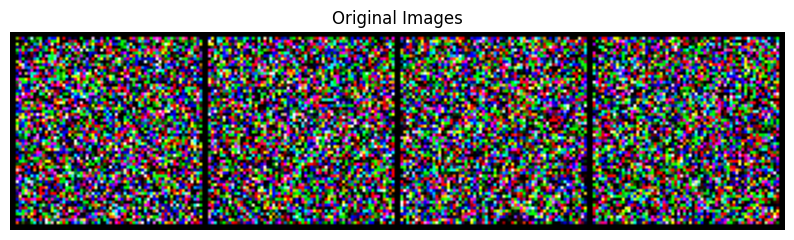

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


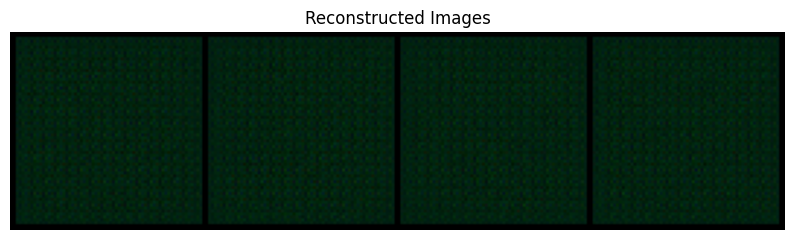

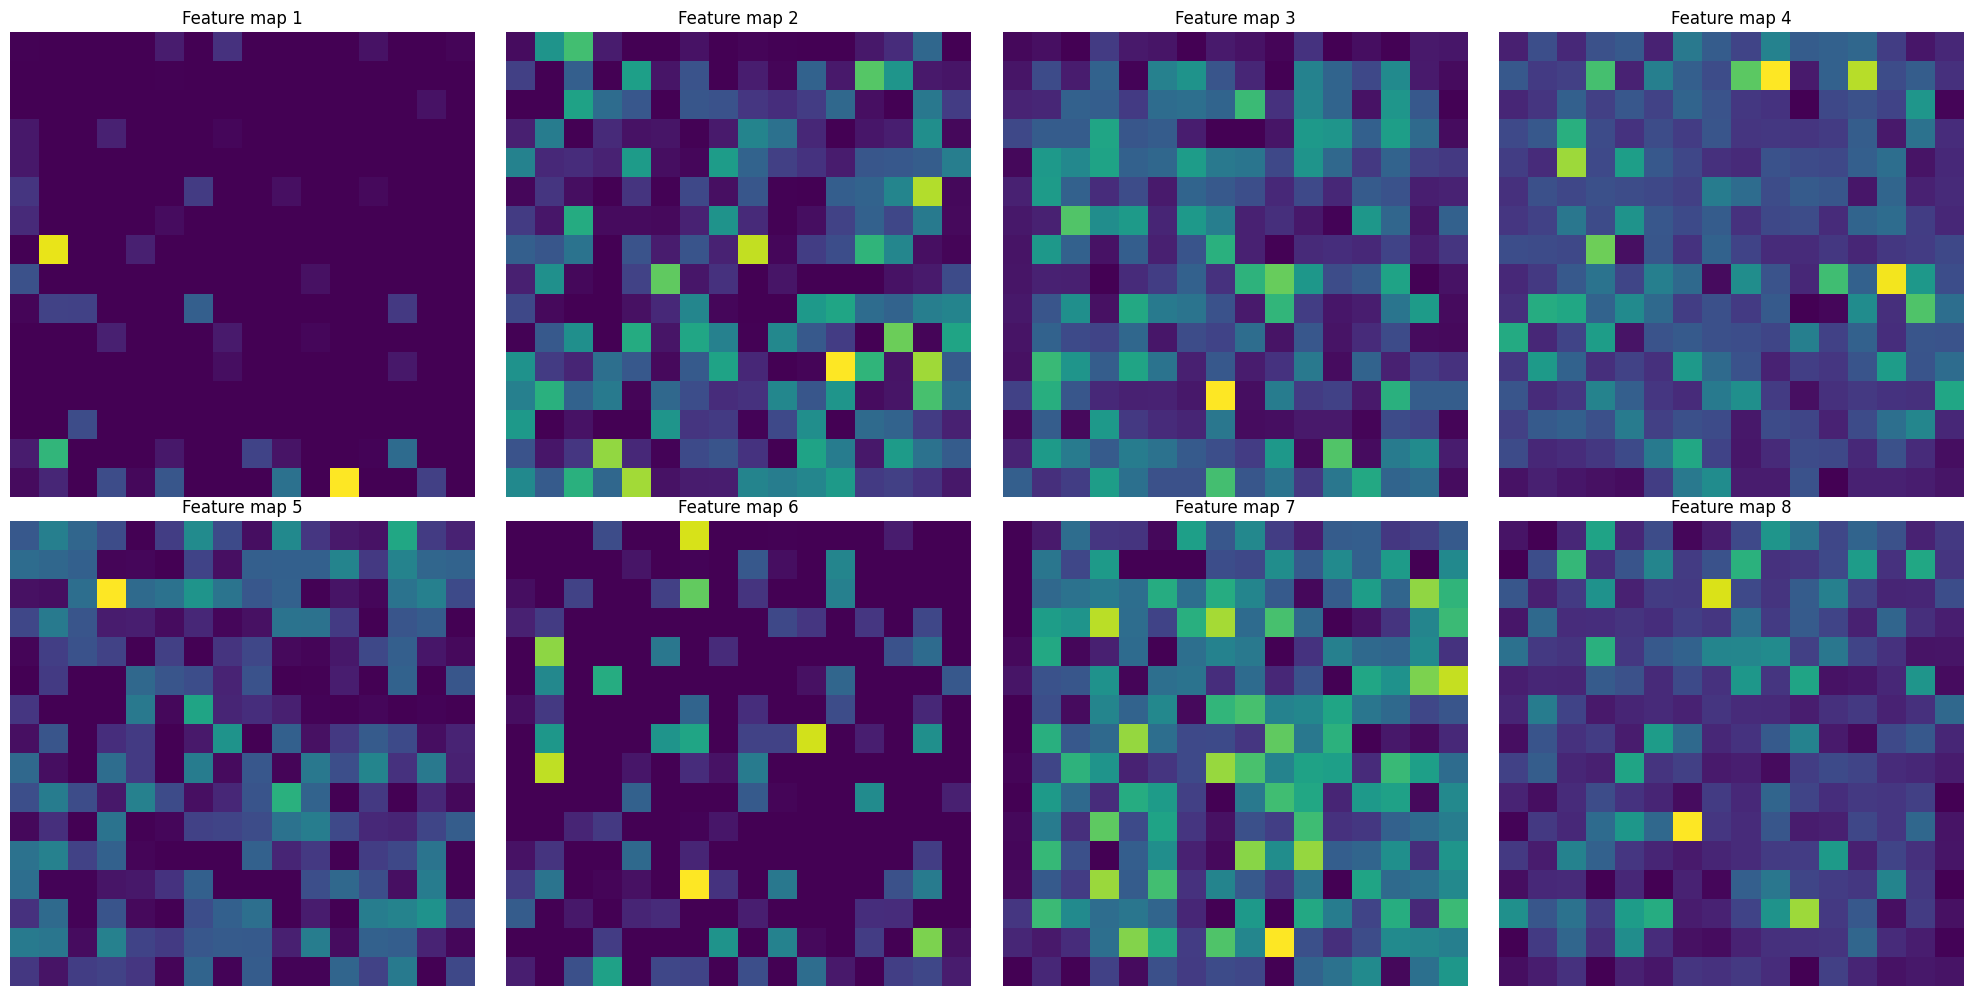

In [13]:
test_encoder_decoder()